In [122]:
import numpy as np
import math

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure
import skimage.segmentation

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

Let's take a look into the directory we want to work with.

In [48]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AA4E-4F31

 Directory of C:\Users\Amjad\git\bootcamp\data\bacterial_growth

06/20/2017  12:03 PM    <DIR>          .
06/20/2017  12:03 PM    <DIR>          ..
06/20/2017  12:03 PM         1,047,928 bacillus_001.tif
06/20/2017  12:03 PM         1,047,918 bacillus_002.tif
06/20/2017  12:03 PM         1,047,928 bacillus_003.tif
06/20/2017  12:03 PM         1,047,922 bacillus_004.tif
06/20/2017  12:03 PM         1,047,926 bacillus_005.tif
06/20/2017  12:03 PM         1,047,918 bacillus_006.tif
06/20/2017  12:03 PM         1,047,922 bacillus_007.tif
06/20/2017  12:03 PM         1,047,924 bacillus_008.tif
06/20/2017  12:03 PM         1,047,926 bacillus_009.tif
06/20/2017  12:03 PM         1,047,918 bacillus_010.tif
06/20/2017  12:03 PM         1,047,912 bacillus_011.tif
06/20/2017  12:03 PM         1,047,920 bacillus_012.tif
06/20/2017  12:03 PM         1,047,922 bacillus_013.tif
06/20/2017  12:03 PM         1,047,926 bacillus_014.tif
06

In [73]:
# Load the images.
num = [str(i).zfill(2) for i in range(1,56)]
jin_ims = [skimage.io.imread('data/bacterial_growth/bacillus_0' + i + '.tif') for i in num]

Now I check if it actually worked.

C:\Users\Amjad\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


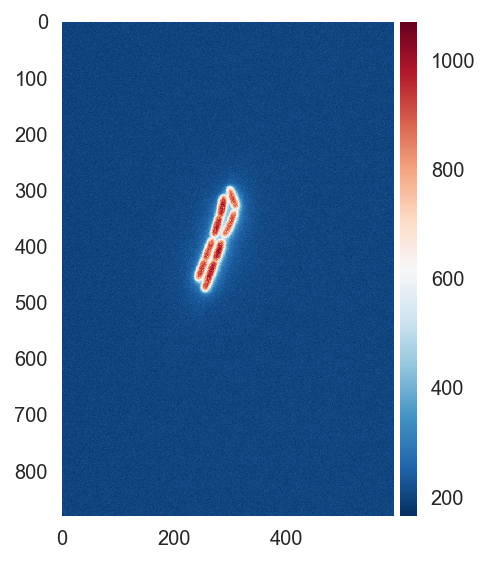

In [78]:
with sns.axes_style('dark'):
    skimage.io.imshow(jin_ims[25], cmap=plt.cm.RdBu_r)

Nice! Now let's segment them.

In [140]:
jin_bw = [None]*55
for i in range(0,55):
    thresh_otsu = skimage.filters.threshold_otsu(jin_ims[i])
    jin_bw[i] = jin_ims[i] > thresh_otsu

Let's see if it worked.

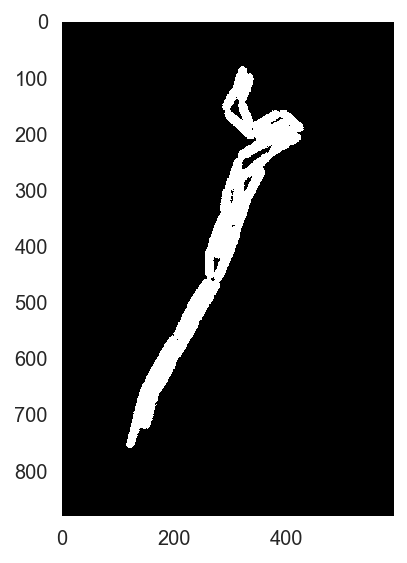

In [141]:
with sns.axes_style('dark'):
    skimage.io.imshow(jin_bw[50], cmap=plt.cm.gray)

In [142]:
int_pxl = 64.5e-3
scale_bar_len = math.floor(10/int_pxl)
for i in range(0,55):
    jin_bw[i][820:830, 400:400+scale_bar_len] = 1

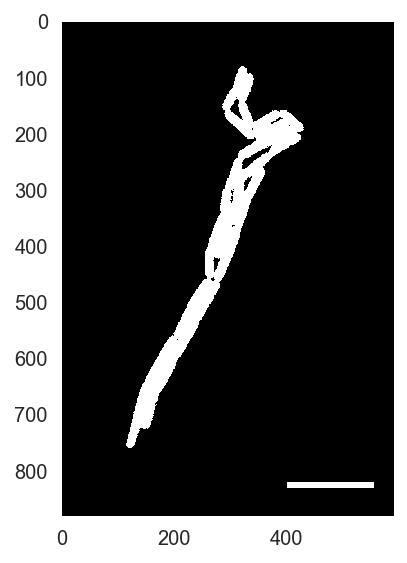

In [144]:
with sns.axes_style('dark'):
    skimage.io.imshow(jin_bw[50], cmap=plt.cm.gray)

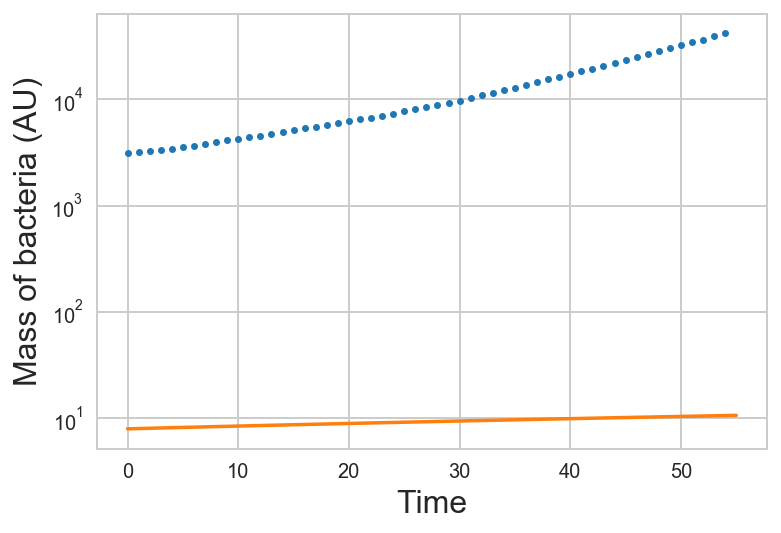

In [165]:
x = range(0,55)
y = [np.sum(jin_bw[i])for i in range(0,55)]

fig, ax = plt.subplots(1,1)
_ = ax.set_xlabel('Time')
_ = ax.set_ylabel('Mass of bacteria (AU)')
_ = ax.set_yscale('log')
_ = ax.plot(x,y , marker='.', linestyle='none')

r = np.polyfit(x, np.log(y), 1)
theor_x = np.arange(0,56)
theor_y = r[1] + r[0]*theor_x
_ = ax.plot(theor_x, theor_y)

plt.show()


In [161]:
theor_x = np.arange(0,56)
theor_x
thoer_y = r[1] + r[0]*theor_x
theor_y

NameError: name 'theor_y' is not defined

In [153]:
r

array([  596.98253968, -3256.07402597])